In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('c:/Users/91959/Desktop/aftech/clean_fraudCombined.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 19 columns):
 #   Column      Dtype  
---  ------      -----  
 0   merchant    float64
 1   category    int64  
 2   amt         float64
 3   gender      int64  
 4   street      float64
 5   city        float64
 6   state       int64  
 7   zip         int64  
 8   lat         float64
 9   long        float64
 10  city_pop    int64  
 11  job         float64
 12  merch_lat   float64
 13  merch_long  float64
 14  is_fraud    int64  
 15  DOB_Year    int64  
 16  DOB_Month   int64  
 17  trns_Month  int64  
 18  trns_Hour   int64  
dtypes: float64(9), int64(10)
memory usage: 268.5 MB


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [14]:
df['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [17]:
total_row = df.shape[0]
class_zero = df['is_fraud'].value_counts()[0]
class_one = df['is_fraud'].value_counts()[1]
print(total_row, class_zero, class_one)

1852394 1842743 9651


In [18]:
print('class_zero percentage:',((class_zero/total_row)*100))
print('class_one percentage:',((class_one/total_row)*100))

class_zero percentage: 99.47899852839083
class_one percentage: 0.5210014716091717


In [5]:
df.columns

Index(['merchant', 'category', 'amt', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'merch_lat', 'merch_long',
       'is_fraud', 'DOB_Year', 'DOB_Month', 'trns_Month', 'trns_Hour'],
      dtype='object')

In [6]:
columns_order = ['merchant', 'category', 'amt', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'merch_lat', 'merch_long','DOB_Year', 'DOB_Month', 'trns_Month', 'trns_Hour', 'is_fraud']

In [8]:
df = df[columns_order]

In [9]:
df.head(3)

,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,DOB_Year,DOB_Month,trns_Month,trns_Hour,is_fraud
0,0.013575,8,4.97,0,0.003758,0.003758,27,28654,36.0788,-81.1781,3495,0.003320,36.011293,-82.048315,1988,3,1,0,0
1,0.009921,4,107.23,0,0.001605,0.002160,47,99160,48.8878,-118.2105,149,0.002472,49.159047,-118.186462,1978,6,1,0,0
2,0.001893,0,220.11,1,0.010884,0.010884,13,83252,42.1808,-112.2620,4154,0.021534,43.150704,-112.154481,1962,1,1,0,0


In [10]:
X = df.iloc[:,:-1]
Y = df['is_fraud']

In [11]:
print(X.shape)
print(Y.shape)

(1852394, 18)
(1852394,)


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
dt_classifier = DecisionTreeClassifier(class_weight="balanced")

dt_classifier.fit(X_train, Y_train)

y_pred = dt_classifier.predict(X_test)

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.83      0.81      0.82      1953

    accuracy                           1.00    370479
   macro avg       0.92      0.90      0.91    370479
weighted avg       1.00      1.00      1.00    370479



In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(Y_test,y_pred))

Accuracy: 0.9981429446743271


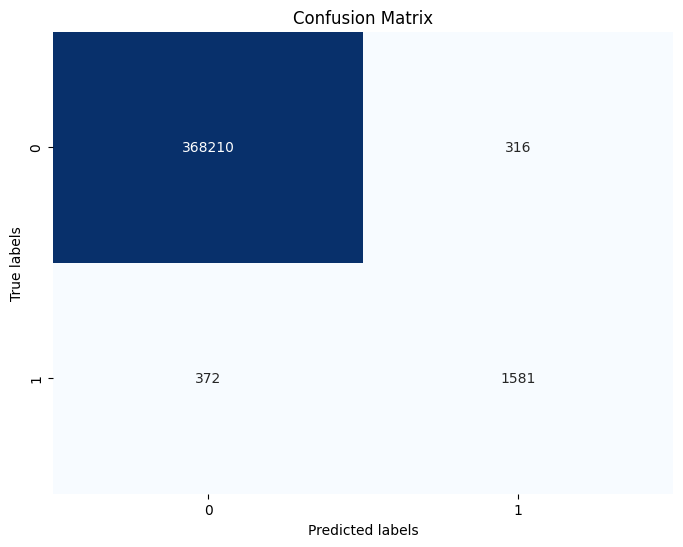

In [23]:
cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# import pickle

# pickle.dump(dt_classifier, open('deci_tree_fraud_v1', 'wb'))

In [26]:
# import pickle

# dt_classifier = pickle.load(open('deci_tree_fraud_v1', 'rb'))
# type(dt_classifier)

sklearn.tree._classes.DecisionTreeClassifier